# Core 1 - Resampling Datetime Data

- Name: Tyler Schelling
- Date: 1/31/2023
    
---

For this assignment, you will be working with a modified version of weather data from [London from Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data). 

The assignment is split into 3 parts:

- Part 1: Load the data and create a datetime index

- Part 2: Answer 2 Questions using Visualizations and the Correct Frequency Data

---

## Part 1 - Load the Data and Make a Datetime Index

You must first load in the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
4. Impute any missing values.
    - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!
    
---

### Import Libraries | Download Data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('Data/london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Convert the Date Column to Datetime Datatype

In [3]:
fmt = '%Y%m%d'
df['date'] = pd.to_datetime(df['date'], format = fmt)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Set the Date Column as the Index

In [4]:
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Filter Out Only the Required Data

In [5]:
df = df.loc['2000':]
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


In [6]:
df.drop(columns = ['cloud_cover', 'sunshine', 'global_radiation', 'pressure'], inplace = True)
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


### Impute any Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [8]:
df_impute = df.groupby(df.index.month).mean()
df_impute

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
1,8.427451,5.600000,2.752124,1.896895,0.079447
2,9.152548,6.022792,2.920000,1.791388,0.093985
3,11.780906,7.935285,4.143296,1.354531,0.005102
4,15.423873,10.777219,6.188982,1.345910,0.007605
5,18.583651,13.864696,9.261429,1.506041,0.000000
6,21.933277,17.085593,12.293570,1.565313,0.000000
7,23.940000,19.079355,14.241707,1.552903,0.000000
8,23.256352,18.701797,14.101626,1.813333,0.000000
9,20.468159,16.142667,11.792040,1.365837,0.000000


In [9]:
# Impute missing values with the average values for each month
cols = ['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'snow_depth']
for ind in df.index:
    for col in cols:
        if pd.isna(df.loc[ind][col]):
            month = ind.month
            df.loc[ind][col] = df_impute.loc[month][col]
            
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   precipitation  7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 617.6 KB


## Part 2 - Answer the Questions with Visualizations

- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

---

### Q1: What month had the most precipitation between 2000 through 2010?

- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.
    
#### Q1 Visualization Requirements

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With a title of "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Have the major ticks' labels rotated 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks.

### Resample the Data as Monthly

In [10]:
ts = df.resample('M').sum()
ts

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-31,261.882353,176.300000,86.556373,19.990686,0.238342
2000-02-29,297.152548,206.922792,112.920000,63.991388,0.093985
2000-03-31,377.980906,262.535285,151.143296,14.754531,0.005102
2000-04-30,404.347746,277.654439,162.277963,74.491820,0.015209
2000-05-31,557.367302,430.129393,297.422857,71.412083,0.000000
...,...,...,...,...,...
2020-08-31,782.369055,634.205392,492.003252,48.826667,0.000000
2020-09-30,646.068159,495.742667,346.592040,20.565837,0.000000
2020-10-31,466.202941,369.448768,276.321207,147.859380,0.000000


### Find the Date and Corresponding Value for the Max Precipitation

In [11]:
prec_ts = ts.loc['2000':'2010', 'precipitation'].copy()
prec_ts

date
2000-01-31    19.990686
2000-02-29    63.991388
2000-03-31    14.754531
2000-04-30    74.491820
2000-05-31    71.412083
                ...    
2010-08-31    89.240000
2010-09-30    40.731675
2010-10-31    65.459380
2010-11-30    36.388851
2010-12-31    23.077258
Freq: M, Name: precipitation, Length: 132, dtype: float64

In [12]:
prec_max = prec_ts.idxmax()
print(prec_max)
prec_ts.loc[prec_max]

2009-11-30 00:00:00


140.7981418918919

### Q1 Visualization

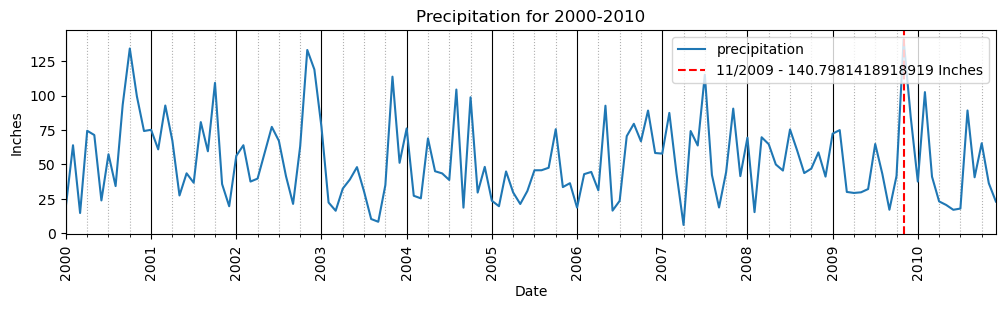

In [13]:
fig, ax = plt.subplots(figsize = (12, 3))
prec_ts.plot(ax = ax, title = 'Precipitation for 2000-2010')

ax.axvline(prec_max, ls='--',color='red',label=f'{prec_max.month}/{prec_max.year} - {prec_ts.loc[prec_max]} Inches')
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
fig.autofmt_xdate(rotation=90,ha='center')
ax.legend(loc='upper right');

NOTE: USING VARIOUS MDATES METHODS CAUSED MAJOR VISUAL BUGS IN THE CHART. REMOVING THEM ALLOWED FOR THE CORRECT VISUALIZATION TO BE MADE?

### Q2: Which year between 2000-2020 had the coolest average temperature?

- Resample the data as Yearly frequency.
- Find the date and corresponding value for the max mean temp.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the max precipitation value.
- What was the temperature?

#### Q2 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With a title of "Average Temperature"
        - With a ylabel of "Degrees"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Have the major ticks' labels rotated 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 1 year
        - Do not label the minor ticks.

### Resample the Data as Yearly

In [14]:
ts2 = df.resample('A').sum()
ts2

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-12-31,5559.754263,4241.142322,2929.017658,761.778815,3.526107
2001-12-31,5476.028351,4138.215259,2793.599246,709.275771,0.182323
2002-12-31,5757.082781,4393.638159,3055.437873,778.911116,0.245947
2003-12-31,5994.717741,4446.372674,2903.320675,484.916996,9.441558
2004-12-31,5689.259206,4348.724615,3002.419319,625.031222,2.423168
2005-12-31,5726.903136,4321.665932,2917.573974,454.989794,3.432123
2006-12-31,5892.924356,4480.625916,3096.554307,634.917345,0.577516
2007-12-31,5764.373046,4352.914773,2958.896810,686.493308,6.929292
2008-12-31,5557.943487,4153.940070,2771.296605,641.549125,4.461161


### Find the Date and Corresponding Value for the Max Mean Temp

In [15]:
temp_ts = ts.loc['2000':'2020', 'mean_temp'].copy()
temp_ts

date
2000-01-31    176.300000
2000-02-29    206.922792
2000-03-31    262.535285
2000-04-30    277.654439
2000-05-31    430.129393
                 ...    
2020-08-31    634.205392
2020-09-30    495.742667
2020-10-31    369.448768
2020-11-30    291.894068
2020-12-31    188.133549
Freq: M, Name: mean_temp, Length: 252, dtype: float64

In [16]:
avg_temp_max = temp_ts.idxmax()
print(avg_temp_max)
temp_ts.loc[avg_temp_max]

2006-07-31 00:00:00


695.6

### Determine the date and value for the lowest mean temp.

In [17]:
avg_temp_min = temp_ts.idxmin()
print(avg_temp_min)
temp_ts.loc[avg_temp_min]

2010-12-31 00:00:00


41.18670988654781

### Q2 Visualization

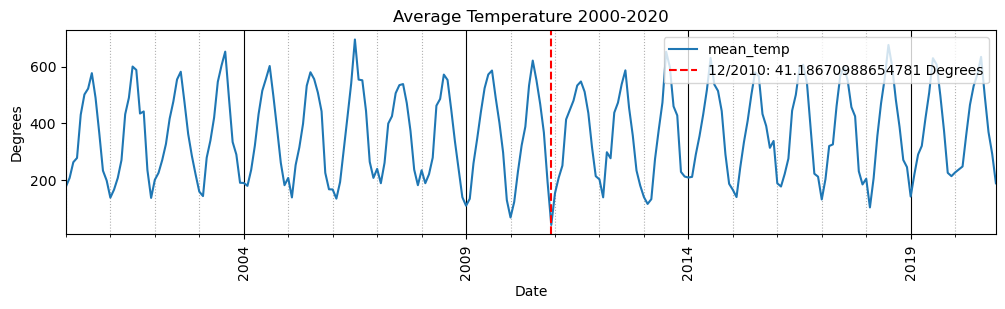

In [18]:
fig, ax = plt.subplots(figsize = (12, 3))
temp_ts.plot(ax = ax, title = 'Average Temperature 2000-2020')

ax.axvline(avg_temp_min, ls='--',color='red',label=f'{avg_temp_min.month}/{avg_temp_min.year}: {temp_ts.loc[avg_temp_min]} Degrees')
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

ax.set_ylabel('Degrees')
ax.set_xlabel('Date')
fig.autofmt_xdate(rotation=90,ha='center')
ax.legend(loc='upper right');